In [7]:
# import libraries


#manipulação de dados
import pandas as pd
import numpy as np
import missingno

#visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# testes de hipóteses
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import ks_2samp
from scipy import stats

#pre-processamento
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.impute import KNNImputer


#modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

#avaliação de modelos
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# definição do caminho do dataset
path = r"C:\Users\vanes\Documents\02-Estudos\FundamentosEngenhariaSoftware\data\dados.xlsx"

# carregamento
df =  pd.read_excel(path)

# criar cópia backup
df_copy = df.copy()

In [9]:
# visualizar primeiras linhas
df.head()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0


---
**Dicionário de Dados** 📊

| Nome da Coluna      | Tipo de Dados  | Descrição                                                   |
| ------------------- | -------------- | ------------------------------------------------------------ |
| `score_1`           | Numérico       | Pontuação de avaliação 1 (ex: risco, qualidade, etc.)        |
| `score_2`           | Numérico       | Pontuação de avaliação 2                                      |
| `score_3`           | Numérico       | Pontuação de avaliação 3                                      |
| `score_4`           | Numérico       | Pontuação de avaliação 4                                      |
| `score_5`           | Numérico       | Pontuação de avaliação 5                                      |
| `score_6`           | Numérico       | Pontuação de avaliação 6                                      |
| `country` (`país`)  | Texto          | País relacionado à compra ou ao cliente                      |
| `score_7`           | Numérico       | Pontuação de avaliação 7                                      |
| `product`           | Texto          | Nome ou código do produto                                     |
| `product_category`  | Texto          | Categoria à qual o produto pertence                           |
| `score_8`           | Numérico       | Pontuação de avaliação 8                                      |
| `score_9`           | Numérico       | Pontuação de avaliação 9                                      |
| `score_10`          | Numérico       | Pontuação de avaliação 10                                    |
| `doc_delivery_1`    | Binário (0/1)  | Indicador se o documento 1 foi entregue                      |
| `doc_delivery_2`    | Binário (0/1)  | Indicador se o documento 2 foi entregue                      |
| `doc_delivery_3`    | Binário (0/1)  | Indicador se o documento 3 foi entregue                      |
| `purchase_date`     | Data           | Data em que a compra foi feita                                |
| `purchase_value`    | Numérico       | Valor monetário da compra                                    |
| `fraud_score_model` | Numérico       | Pontuação de fraude prevista pelo modelo                    |
| `fraud`             | Binário (0/1)  | Indicador se a compra foi fraudulenta (1 = fraude)            |

---

## Feature engineering

### Criando categoria outros baseado na quantidade de fraude

,categoria_produto,qnt_registros,fraude,percent_cumsum_fraude
0,cat_43b9c10,2331,380,5.066667
1,cat_d9753d4,453,115,6.600000
2,cat_4249bd8,1191,98,7.906667
3,cat_8ef7164,909,81,8.986667
4,cat_6c4cfdc,1449,74,9.973333
...,...,...,...,...
995,cat_7442382,3,1,87.160000
996,cat_b1a01f7,3,1,87.173333
997,cat_858d0c2,3,1,87.186667
998,cat_e4205a7,30,1,87.200000


<Axes: >

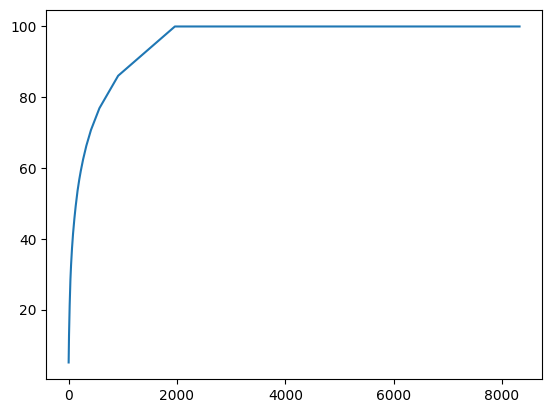

In [10]:
# Categoria produto

# Contar o total de linhas por categoria
item_cat = df.categoria_produto.value_counts().reset_index()
item_cat.columns = ['categoria_produto', 'qnt_registros']  # <- CORREÇÃO: renomeando colunas

# Soma de fraudes por categoria
fraude_cat = df.groupby('categoria_produto')['fraude'].sum().reset_index()

# Juntar ambas as tabelas
df_item_fraude = pd.merge(item_cat, fraude_cat, on='categoria_produto', how='left')

# Ordenar pelo número de fraudes (decrescente)
df_item_fraude = df_item_fraude.sort_values(by='fraude', ascending=False).reset_index(drop=True)

# Percentual acumulado de fraudes
df_item_fraude['percent_cumsum_fraude'] = df_item_fraude['fraude'].cumsum() / df['fraude'].sum() * 100

# Exibir
display(df_item_fraude[0:1000])
df_item_fraude['percent_cumsum_fraude'].plot()


In [11]:
# Verificar onde temos 80% das fraudes

# 1. Ordenar as categorias pelo número de fraudes em ordem decrescente
df_item_fraude = df_item_fraude.sort_values(by='fraude', ascending=False).reset_index(drop=True)

# 2. Calcular o percentual acumulado de fraudes
df_item_fraude['percent_cumsum_fraude'] = df_item_fraude['fraude'].cumsum() / df['fraude'].sum() * 100

# 3. Marcar quais categorias estão dentro dos primeiros 80% de fraudes acumuladas
df_item_fraude['reaches_80'] = df_item_fraude['percent_cumsum_fraude'] <= 80

# Seleciona as categorias menos frequentes (após as 1000 categorias com mais fraudes)
produtos_categorias = df_item_fraude[685:]

# Extrai os nomes dessas categorias para uma lista
lista_categorias_outros = produtos_categorias.categoria_produto.to_list()

# Cria uma nova coluna copiando a categoria original
df['grupo_categorias'] = df["categoria_produto"]

# Substitui as categorias pequenas pelo rótulo "categorias_outros"
df.loc[df["grupo_categorias"].isin(lista_categorias_outros), "grupo_categorias"] = "categorias_outros"


In [12]:
df.grupo_categorias.value_counts()

grupo_categorias
categorias_outros    62326
cat_43b9c10           2331
cat_d69bed9           1799
cat_604df77           1784
cat_6c4cfdc           1449
                     ...  
cat_ae073e3              6
cat_47850ba              6
cat_7fee0bd              5
cat_c9106a0              5
cat_4a6ba1e              5
Name: count, Length: 686, dtype: int64

### Agrupando países

In [13]:
# redefinindo categorias de países
df['paises_agrupados'] = np.where(df['pais'].isin(['BR', 'AR']), df['pais'], 'Outros')

In [14]:
df

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,...,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude,grupo_categorias,paises_agrupados
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,...,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0,cat_8d714cd,BR
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,...,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0,cat_64b574b,BR
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,...,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0,cat_e9110c5,AR
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,...,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0,cat_d06e653,BR
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,...,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0,cat_6c4cfdc,BR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,4,0.8191,21393.63,7.0,0.000000,1.0,BR,4,Aparelho Lipocavitação Ultrassônico + Gel Cond...,cat_a5b2091,...,434.0,1,NaN,N,2020-04-11 19:31:07,47.15,95,0,categorias_outros,BR
149996,4,NaN,NaN,24.0,0.384615,11.0,UY,20,"Sellos De Goma Automaticos, Personalizados.",cat_e39ab7e,...,135.0,1,NaN,Y,2020-03-11 20:21:35,9.69,0,0,categorias_outros,Outros
149997,4,NaN,NaN,3.0,0.477778,1.0,BR,19,Hélice 3 Pás Alumínio Rabeta 6.5 Hp Pesca Barc...,cat_ee6ecc8,...,127.0,1,NaN,Y,2020-03-11 19:36:07,5.97,15,0,categorias_outros,BR
149998,4,0.6067,152906.86,1.0,0.099175,133.0,BR,3,Tela Display Lcd Galaxy J7 Neo J701 Com Brilho...,cat_237e2d0,...,123.0,1,NaN,Y,2020-03-16 07:13:24,25.83,59,0,cat_237e2d0,BR


### Coluna indicando missing

In [15]:

# Criação de coluna que indique se coluna entrega_doc_2 era missing ou não 
# (ela tinha 70% de dados missing e não queremos perder essa info)
df['entrega_doc_2_nan'] = np.where(df['entrega_doc_2'].isnull(), 1, 0)


### Coluna indicando se pelo menos 1 doc foi entregue

In [16]:


# Criar uma nova coluna indicando se pelo menos 1 documento foi entregue
df['entrega_doc'] = df[['entrega_doc_1', 'entrega_doc_2', 'entrega_doc_3']].any(axis=1).astype(int)



## Validação, Split e Preparo de Dados

In [17]:
cols_to_use = ['score_1',
               'score_2',
               'score_3',
               'score_4',
               'score_5',
               'score_6',
               'score_7',
               'score_8',
               'score_9',
               'score_10',
               'entrega_doc_1',
               'entrega_doc_3',
               'valor_compra',
               'entrega_doc_2_nan',
               'paises_agrupados',
               'grupo_categorias',
               'entrega_doc',
               'fraude'] # essa ultima é o target

### Label encoder - categóricas
Como não há risco de vazamento no label e no onehot encoding, podemos aplicar antes do split

In [18]:
cat = [col for col in df.select_dtypes(include='object').columns]
cat

['pais',
 'produto',
 'categoria_produto',
 'entrega_doc_2',
 'entrega_doc_3',
 'grupo_categorias',
 'paises_agrupados']

In [19]:
# aplicando label encoding em todas para EXEMPLIFICAR
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat:
    df.loc[:, col] = le.fit_transform(df[col].astype(str))

#### Split entre Treino e Teste:

In [20]:
# separamos entre features e target
X = df[cols_to_use].drop(columns='fraude')
y = df['fraude']

In [21]:
# fazemos o slipt entre treino e teste (70% para treino e 30% para teste )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Preenchendo Missing

Como vamos imputar um valor nos nulos, devemos fazer isso **depois** do split dos dados, justamente para não haver vazamento de informações. Para isso, calculamos as métricas dos dados de treino e usamos ela tanto na amostra de treino, quanto no de teste.

In [22]:
# Selecionar apenas colunas numéricas que possuem valores ausentes (NaN)
cols_com_missing = X_train.select_dtypes(include='number').columns[X_train.select_dtypes(include='number').isna().sum() > 0]



In [23]:
cols_com_missing

Index(['score_2', 'score_3', 'score_4', 'score_6', 'score_9', 'score_10'], dtype='object')

- Colunas Numéricas (Normalização e Padronização): em tese, não seria necessária pois estamos usando um algoritmo baseado em árvore. 
- Porém, como estamos usando KNN imputer, que é baseado em distância, precisamores fazer a normalização antes

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Criar cópias dos conjuntos de treino e teste para preservar os dados originais
X_train_scaled = X_train[cols_com_missing].copy()
X_test_scaled = X_test[cols_com_missing].copy()

# Instanciar o MinMaxScaler para normalizar os dados no intervalo [0, 1]
scaler = MinMaxScaler()

# Ajustar o scaler com os dados de treino e transformar o conjunto de treino
X_train_scaled[cols_com_missing] = scaler.fit_transform(X_train[cols_com_missing])

# Transformar o conjunto de teste usando o scaler já treinado (NÃO usar fit aqui!)
X_test_scaled[cols_com_missing] = scaler.transform(X_test[cols_com_missing])

In [25]:

# Criar o imputador KNN (com 5 vizinhos, você pode ajustar)
imputer = KNNImputer(n_neighbors=5)

# Aplicar o KNN apenas nas colunas numéricas
X_train_num = X_train_scaled.copy()

# Transformar os dados
X_train_imputed = imputer.fit_transform(X_train_num)

# Colocar de volta em um DataFrame com os mesmos nomes de colunas
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train_num.columns, index=X_train_num.index)

# Substituir essas colunas no df original (mantendo colunas categóricas iguais e as que numéricas que não tinha missing também)
X_train[cols_com_missing] = X_train_imputed

In [26]:
# Preenche o X_test com a o imputer calculado no X_train

X_test_num = X_test_scaled.copy()
X_test_imputed = imputer.transform(X_test_num)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test_num.columns, index=X_test_num.index)

# Substituir no df original (mantendo colunas categóricas iguais)
X_test[cols_com_missing] = X_test_imputed

In [27]:
X_train

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,entrega_doc_1,entrega_doc_3,valor_compra,entrega_doc_2_nan,paises_agrupados,grupo_categorias,entrega_doc
27822,4,0.79430,0.002032,0.26,0.387924,0.000044,12,0.749200,0.079136,0.269526,1,1,23.33,1,1,342,1
85202,4,0.74700,0.003810,0.14,0.000000,0.000607,11,0.300365,0.218187,0.093002,1,1,34.35,1,1,581,1
42217,4,0.71090,0.028370,0.00,0.000000,0.000030,43,0.682765,0.000000,0.000000,0,0,34.46,1,1,145,1
119958,4,0.71530,0.002020,0.38,0.464883,0.000030,8,0.841789,0.024655,0.028442,0,0,5.80,1,1,685,1
37678,4,0.77410,0.005137,1.00,0.230769,0.000200,7,0.316156,0.360817,0.540406,1,1,5.95,0,1,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,4,0.74360,0.000577,0.14,1.316527,0.000022,22,0.064074,0.321580,0.357111,1,1,5.05,0,1,685,1
103694,4,0.58742,0.013257,0.74,0.000000,0.000585,11,0.779521,0.571448,0.156659,1,1,131.91,1,1,523,1
131932,4,0.60780,0.039033,1.00,0.000000,0.000044,0,0.314858,0.054878,0.146727,1,1,467.31,1,0,685,1
146867,4,0.71260,0.014315,0.50,0.000000,0.000052,2,0.060116,0.269883,0.125508,1,1,33.96,1,1,685,1


In [28]:
X_test

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,entrega_doc_1,entrega_doc_3,valor_compra,entrega_doc_2_nan,paises_agrupados,grupo_categorias,entrega_doc
59770,4,0.7643,0.016152,0.02,0.000000,0.000318,35,0.335790,0.623674,0.000000,1,0,30.11,0,1,685,1
21362,4,0.6197,0.000041,0.04,0.000000,0.000030,0,0.797191,0.202280,0.000000,0,0,38.47,0,1,275,1
127324,4,0.8011,0.004093,0.04,0.561304,0.000030,2,0.217023,0.133351,0.058239,1,1,6.02,0,1,29,1
140509,4,0.8588,0.000156,0.06,0.597080,0.000030,3,0.354745,0.395811,0.146275,1,1,13.63,1,1,685,1
144297,4,0.8511,0.000256,0.32,0.390681,0.000200,12,0.111305,0.263786,0.059142,1,1,5.98,1,1,685,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89890,2,0.6439,0.002244,0.02,0.000000,0.000030,31,0.593230,0.000000,0.000000,1,0,3.26,1,1,101,1
94082,4,0.8665,0.003342,0.06,0.102495,0.000037,9,0.973731,0.138521,0.044244,1,1,19.05,1,1,685,1
29674,2,0.6382,0.000067,0.10,0.000000,0.000022,5,0.580469,0.455859,0.077652,1,0,8.15,1,0,197,1
92625,4,0.7382,0.000155,0.22,0.360010,0.000178,53,0.147089,0.360419,0.042889,1,0,7.55,1,1,542,1


## Modelagem


In [29]:
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# Define o modelo base
dt_model = DecisionTreeClassifier(random_state=42, class_weight="balanced")

# Define o espaço de busca
search_spaces = {
    "max_depth": Integer(3, 15),
    "min_samples_split": Integer(2, 20),
    "min_samples_leaf": Integer(1, 20),
    "criterion": Categorical(["gini", "entropy"])
}

# BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=dt_model,
    search_spaces=search_spaces,
    n_iter=30,           # número de iterações de otimização
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    random_state=42
)

bayes_search.fit(X_train, y_train)
print("Melhores hiperparâmetros (Bayesiano):", bayes_search.best_params_)


Melhores hiperparâmetros (Bayesiano): OrderedDict({'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 20})


In [30]:
# Supondo que usamos a busca Bayesiana, mas serve para Grid ou Random também
best_params = bayes_search.best_params_  # pode ser random_search.best_params_ ou grid_search.best_params_

final_dt_model = DecisionTreeClassifier(
    class_weight="balanced",
    random_state=42,
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"],
    criterion=best_params["criterion"]
)

# Treina no conjunto under-sampled
final_dt_model.fit(X_train, y_train)

# Fazer previsões (Probabilidades)
y_train_proba_final = final_dt_model.predict_proba(X_train)[:, 1]
y_pred_proba_final = final_dt_model.predict_proba(X_test)[:, 1]

# Classes preditas
y_pred_final = final_dt_model.predict(X_test)


In [31]:
# Avaliar Métricas de Desempenho
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from scipy.stats import ks_2samp

train_auc_final = roc_auc_score(y_train, y_train_proba_final)
test_auc_final = roc_auc_score(y_test, y_pred_proba_final)
precision_final = precision_score(y_test, y_pred_final)
recall_final = recall_score(y_test, y_pred_final)

ks_stat_final, ks_p_final = ks_2samp(
    y_pred_proba_final[y_test==1],
    y_pred_proba_final[y_test==0]
)

print(f"AUC Treino: {train_auc_final:.4f}")
print(f"AUC Teste: {test_auc_final:.4f}")
print(f"KS Statistic: {ks_stat_final:.4f}")
print(f"KS P-value: {ks_p_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall: {recall_final:.4f}")

AUC Treino: 0.8438
AUC Teste: 0.8273
KS Statistic: 0.5172
KS P-value: 0.0000
Precision: 0.1363
Recall: 0.7788


## Feature Selection 

#### Permutation Importance

In [32]:
# Treinar Decision Tree com class_weight: apenas para retornarmos ao modelo original
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_leaf=10,
    class_weight='balanced'  # Ajusta pesos automaticamente para classes desbalanceadas
)
dt_model.fit(X_train, y_train)  # Treinamento com todos os dados de treino

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [33]:
from sklearn.inspection import permutation_importance

# Permutation Importance
result_perm = permutation_importance(
    dt_model,                 # modelo já treinado
    X_test,           # conjunto de teste
    y_test,                   # labels verdadeiros
    scoring='roc_auc',        # métrica para avaliar
    n_repeats=10,             # quantas permutações por feature
    random_state=42,
    n_jobs=-1                 # paraleliza para acelerar
)

In [34]:
# Criar dataframe com as importâncias
feature_importances = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': result_perm.importances_mean,
    'importance_std': result_perm.importances_std
})

# Ordenar pelo valor médio
feature_importances = feature_importances.sort_values(by='importance_mean', ascending=False)
print(feature_importances)

              feature  importance_mean  importance_std
13  entrega_doc_2_nan         0.142947        0.003930
9            score_10         0.036231        0.002854
15   grupo_categorias         0.027506        0.001573
10      entrega_doc_1         0.021499        0.001392
5             score_6         0.018199        0.000948
8             score_9         0.015428        0.001547
0             score_1         0.004001        0.000274
6             score_7         0.003036        0.000223
12       valor_compra         0.000792        0.000203
3             score_4         0.000771        0.000509
1             score_2         0.000486        0.000433
11      entrega_doc_3         0.000234        0.000107
2             score_3         0.000147        0.000094
14   paises_agrupados         0.000000        0.000000
7             score_8         0.000000        0.000000
16        entrega_doc         0.000000        0.000000
4             score_5        -0.000134        0.000121


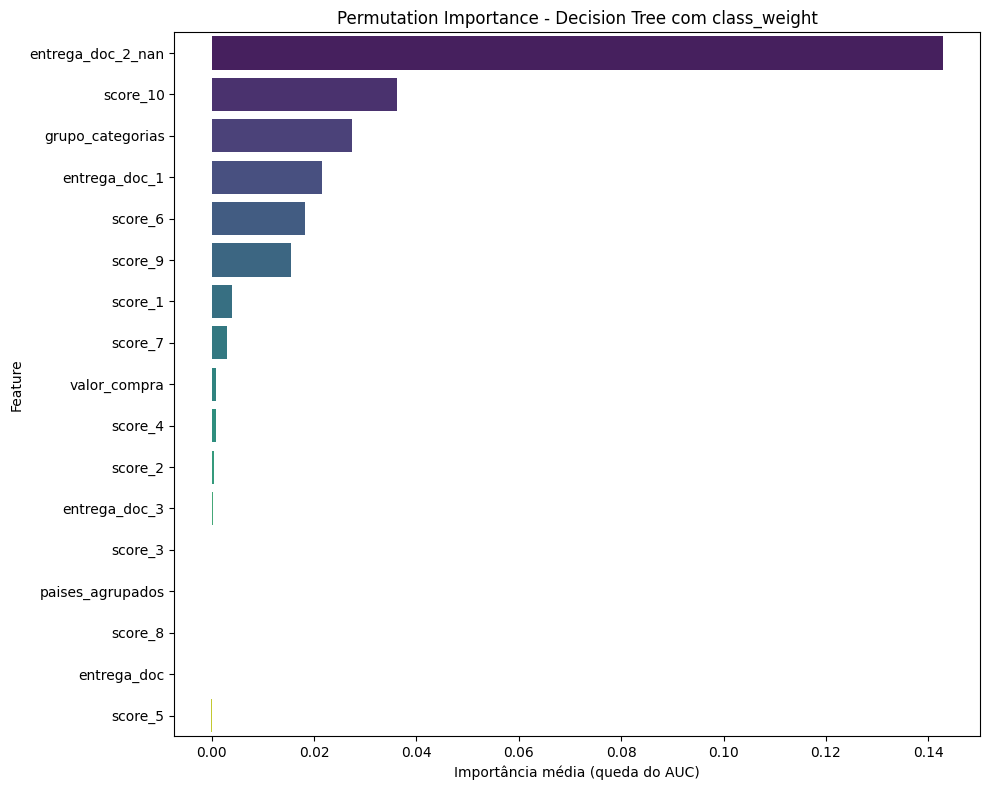

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.barplot(
    x='importance_mean',
    y='feature',
    data=feature_importances,
    palette='viridis'
)

plt.title('Permutation Importance - Decision Tree com class_weight')
plt.xlabel('Importância média (queda do AUC)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


##### Retreinando modelo após seleção das features.

In [36]:
# selecionar features mais importantes
top_features = feature_importances[feature_importances['importance_mean'] > 0]['feature']

# filtrar treino e teste
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# instanciar o modelo
dt_model_top = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_leaf=10,
    class_weight='balanced'
)

# retreinar o modelo
dt_model_top.fit(X_train_top, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [37]:
top_features

13    entrega_doc_2_nan
9              score_10
15     grupo_categorias
10        entrega_doc_1
5               score_6
8               score_9
0               score_1
6               score_7
12         valor_compra
3               score_4
1               score_2
11        entrega_doc_3
2               score_3
Name: feature, dtype: object

In [38]:
# Previsões
y_train_proba = dt_model_top.predict_proba(X_train_top)[:, 1]
y_pred_proba = dt_model_top.predict_proba(X_test_top)[:, 1]
y_pred = dt_model_top.predict(X_test_top)

# Métricas
train_auc = roc_auc_score(y_train, y_train_proba)
test_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

ks_stat, ks_p = ks_2samp(
    y_pred_proba[y_test==1],
    y_pred_proba[y_test==0]
)

print(f"AUC Treino: {train_auc:.4f}")
print(f"AUC Teste: {test_auc:.4f}")
print(f"KS Statistic: {ks_stat:.4f}")
print(f"KS P-value: {ks_p:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



AUC Treino: 0.8338
AUC Teste: 0.8271
KS Statistic: 0.5136
KS P-value: 0.0000
Precision: 0.1430
Recall: 0.7528


In [39]:
print(f"Total de features antes da seleção: {X_train.shape[1]}")
print(f"Total de features depois da seleção: {X_train_top.shape[1]}")

Total de features antes da seleção: 17
Total de features depois da seleção: 13


Observem que mesmo após selecionarmos somente algumas features, a performance do modelo continuou muito similar.

In [43]:
from joblib import dump
# Salvar modelo final com joblib

dump(dt_model_top, r"C:\Users\vanes\Documents\02-Estudos\FundamentosEngenhariaSoftware\modelo_final.joblib")
print("Modelo final salvo em 'modelo_final.joblib'.")

Modelo final salvo em 'modelo_final.joblib'.
